# DSLabs functions

In [101]:
# %run "scripts/dslabs_functions.py"
# may not work due to dependencies from python 3.9

# Data functions

In [102]:
# %run "scripts/data_functions.py"
# may not work due to dependencies from python 3.9

# plot and eval functions
USE THIS INSTEAD OF data functions and dslabs functions

In [103]:
%run scripts/config.py

In [104]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots, savefig
# from dslabs_functions import PAST_COLOR, FUTURE_COLOR, PRED_PAST_COLOR, PRED_FUTURE_COLOR, HEIGHT
from matplotlib.figure import Figure
from matplotlib.font_manager import FontProperties
from pandas import Series
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from math import sqrt



my_palette = {
    "yellow": "#ECD474",
    "pale orange": "#E9AE4E",
    "salmon": "#E2A36B",
    "orange": "#F79522",
    "dark orange": "#D7725E",
    "pale acqua": "#92C4AF",
    "acqua": "#64B29E",
    "marine": "#3D9EA9",
    "green": "#10A48A",
    "olive": "#99C244",
    "pale blue": "#BDDDE0",
    "blue2": "#199ED5",
    "blue3": "#1DAFE5",
    "dark blue": "#0C70B2",
    "pale pink": "#D077AC",
    "pink": "#EA4799",
    "lavender": "#E09FD5",
    "lilac": "#B081B9",
    "purple": "#923E97",
    "white": "#FFFFFF",
    "light grey": "#D2D3D4",
    "grey": "#939598",
    "black": "#000000",
    "red": "#FF0000"
}


LINE_COLOR = my_palette["dark blue"]
FILL_COLOR = my_palette["blue2"]  # my_palette["pale blue"]
DOT_COLOR = my_palette["blue3"]

PAST_COLOR = FILL_COLOR
FUTURE_COLOR = my_palette['pale pink']
PRED_PAST_COLOR = my_palette['yellow']
PRED_FUTURE_COLOR = my_palette['red']


NR_COLUMNS: int = 3
HEIGHT: int = 4

TEXT_MARGIN = 0.05
FONT_SIZE = 6
FONT_TEXT = FontProperties(size=FONT_SIZE)

alpha = 0.3

NR_STDEV: int = 2
IQR_FACTOR: float = 1.5

from typing import Union
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots, savefig
from pandas import Series
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import arange, ndarray
from matplotlib.container import BarContainer
from matplotlib.pyplot import gca

# Define the mean_absolute_percentage_error function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the plot_forecasting_series function
def plot_forecasting_series(
    trn: Series,
    tst: Series,
    prd_tst: Series,
    title: str = "",
    xlabel: str = "time",
    ylabel: str = "",
) -> Axes:
    fig, ax = subplots(1, 1, figsize=(4 * HEIGHT, HEIGHT), squeeze=True)
    fig.suptitle(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.plot(trn.index, trn.values, label="train", color=PAST_COLOR)
    ax.plot(tst.index, tst.values, label="test", color=FUTURE_COLOR)
    ax.plot(prd_tst.index, prd_tst.values, "--", label="test prediction", color=PRED_FUTURE_COLOR)
    ax.legend(prop={"size": 5})

    return ax



def set_chart_labels(ax: Axes, title: str = "", xlabel: str = "", ylabel: str = "") -> Axes:
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax


# Define the plot_multibar_chart function
def plot_multibar_chart(
    group_labels: list,
    yvalues: dict,
    ax: Axes = None,  # type: ignore
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    percentage: bool = False,
) -> Axes:
    if ax is None:
        ax = gca()
    ax = set_chart_labels(ax=ax, title=title, xlabel=xlabel, ylabel=ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)
    bar_labels: list = list(yvalues.keys())

    # This is the location for each bar
    index: ndarray = arange(len(group_labels))
    bar_width: float = 0.8 / len(bar_labels)
    ax.set_xticks(index + bar_width / 2, labels=group_labels)

    for i in range(len(bar_labels)):
        bar_yvalues = yvalues[bar_labels[i]]
        values: BarContainer = ax.bar(
            index + i * bar_width,
            bar_yvalues,
            width=bar_width,
            label=bar_labels[i],
        )
        format = "%.2f" if percentage else "%.0f"
        ax.bar_label(values, fmt=format, fontproperties=FONT_TEXT)
        if any(y < 0 for y in bar_yvalues) and percentage:
            ax.set_ylim(-1.0, 1.0)
    ax.legend(fontsize="xx-small")
    return ax


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from pandas import Series

def plot_single_model_evaluation(train: Series, test: Series, prd_train: Series, prd_test: Series, title: str = ""):
    # Calculate performance metrics
    metrics = {
        "MAE": [
            mean_absolute_error(train, prd_train),
            mean_absolute_error(test, prd_test),
        ],
        "MSE": [
            mean_squared_error(train, prd_train),
            mean_squared_error(test, prd_test),
        ],
        "RMSE": [
            np.sqrt(mean_squared_error(train, prd_train)),
            np.sqrt(mean_squared_error(test, prd_test)),
        ],
        "R²": [
            r2_score(train, prd_train),
            r2_score(test, prd_test),
        ]
    }

    # Create a DataFrame from the metrics dictionary
    performance_df = pd.DataFrame(metrics, index=["Train", "Test"]).T
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=16)
    
    # Plot scale-dependent errors
    scale_dependent_errors = ["MAE", "MSE", "RMSE"]
    scale_dependent_data = performance_df.loc[scale_dependent_errors]
    ax = axs[0]
    ax.set_title("Scale-dependent errors")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    bar_width = 0.2  # Adjusted bar width for more spacing
    index = np.arange(len(scale_dependent_data.columns))
    for i, metric in enumerate(scale_dependent_data.index):
        bars = ax.bar(index + i * bar_width * 1.5, scale_dependent_data.loc[metric], bar_width, label=metric)
        ax.bar_label(bars, fmt='%.2f')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(scale_dependent_data.columns)
    ax.legend()
    
    # Plot R² errors
    r2_data = performance_df.loc[["R²"]]
    ax = axs[1]
    ax.set_title("R² errors")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    bar_width = 0.35
    index = np.arange(len(r2_data.columns))
    for i, metric in enumerate(r2_data.index):
        bars = ax.bar(index + i * bar_width, r2_data.loc[metric], bar_width, label=metric)
        ax.bar_label(bars, fmt='%.2f')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(r2_data.columns)
    ax.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



# Load

In [105]:
import pandas as pd
import numpy as np


file_tag = "Google Merch Store 2024-2025"


test_data=True
# test_data=False


train=pd.read_csv(f"data/df_merch_0_2024_agg_time_final_train.csv", decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

test=pd.read_csv(f"data/df_merch_0_2024_agg_time_final_test.csv", decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

target='Sessions'


train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 318 entries, 2024-01-06 to 2024-11-18
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         318 non-null    float64
 1   Seven-day active users           318 non-null    float64
 2   28-day active users              318 non-null    float64
 3   Events per session               318 non-null    float64
 4   Add to baskets                   318 non-null    float64
 5   Checkouts                        318 non-null    float64
 6   E-commerce purchases             318 non-null    float64
 7   Average purchase revenue         318 non-null    float64
 8   Purchase revenue                 318 non-null    float64
 9   Average session duration         318 non-null    float64
 10  ARPU                             318 non-null    float64
 11  ARPPU                            318 non-null    float64
 12  Vie

# LSTM Tensorflow Multivariate

## Tensorflow Data Prep

In [106]:

# Prepare the training and testing data from dataframes with features and target
trnX = train.drop(columns=[target])
trnY = train[target]
tstX = test.drop(columns=[target])
tstY = test[target]

# Convert the data to a format suitable for LSTM
def create_lstm_dataset(dataX, dataY, seq_length=1):
    X, y = [], []
    for i in range(len(dataX) - seq_length):
        X.append(dataX[i:(i + seq_length)].to_numpy())
        y.append(dataY[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7  # Example sequence length
trnX_lstm, trnY_lstm = create_lstm_dataset(trnX, trnY, seq_length)
tstX_lstm, tstY_lstm = create_lstm_dataset(tstX, tstY, seq_length)

print(f"Training data shape: {trnX_lstm.shape}, {trnY_lstm.shape}")
print(f"Testing data shape: {tstX_lstm.shape}, {tstY_lstm.shape}")


Training data shape: (311, 7, 45), (311,)
Testing data shape: (100, 7, 45), (100,)


# Tensorflow install instructions

1) Open Anaconda Terminal as Admin 

2) Create environment for tensorflow version 3.6-3.9

```bash 
conda create --name tf_env python=3.9
conda activate tf_env
```

3) Install ipykernel to run cells in jupyter as well as additional libraries for the analysis (pandas, numpy, matplotlib, sklearn, etc)

```bash
conda install -n tf_env ipykernel --update-deps --force-reinstall
conda install pandas matplotlib 
pip install scikit-learn
```

4) select the new env in VSC (tf_env) and test installation (should be version 2.10+)

```python
import tensorflow as tf
print(tf.__version__)
```

In [107]:
import tensorflow as tf
print(tf.__version__)

2.10.0


## Tensorflow Model Creation Multivariate

- great resource on YT: https://www.youtube.com/watch?v=94PlBzgeq90

In [108]:
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# Regularization: L2 regularization is added to the LSTM and Dense layers.
# Dropout Rate: The dropout rate is increased to 0.3.
# Learning Rate: The learning rate of the Adam optimizer is set to 0.001.
# Early Stopping: Early stopping is used to prevent overfitting.
# Learning Rate Scheduler: A learning rate scheduler is used to reduce the learning rate when the validation loss plateaus.


# model definition
model = tf.keras.models.Sequential()

# First LSTM layer
model.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(trnX_lstm.shape[1], trnX_lstm.shape[2]), kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Second LSTM layer
model.add(tf.keras.layers.LSTM(64, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.summary()


# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mean_squared_error']
              )

# Train the model
history = model.fit(trnX_lstm, trnY_lstm, epochs=20, batch_size=16, validation_data=(tstX_lstm, tstY_lstm), verbose=1)

# Evaluate the model
loss = model.evaluate(tstX_lstm, tstY_lstm, verbose=0)
print(f'Test Loss: {loss}')

# Evaluate the model
loss = model.evaluate(tstX_lstm, tstY_lstm, verbose=0)
print(f'Test Loss: {loss}')

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 7, 64)             28160     
                                                                 
 lstm_33 (LSTM)              (None, 64)                33024     
                                                                 
 dense_32 (Dense)            (None, 128)               8320      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 1)                 129       
                                                                 
Total params: 69,633
Trainable params: 69,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
20/20 [==============================]

## lstm predictions

4/4 [==============================] - 0s 2ms/step


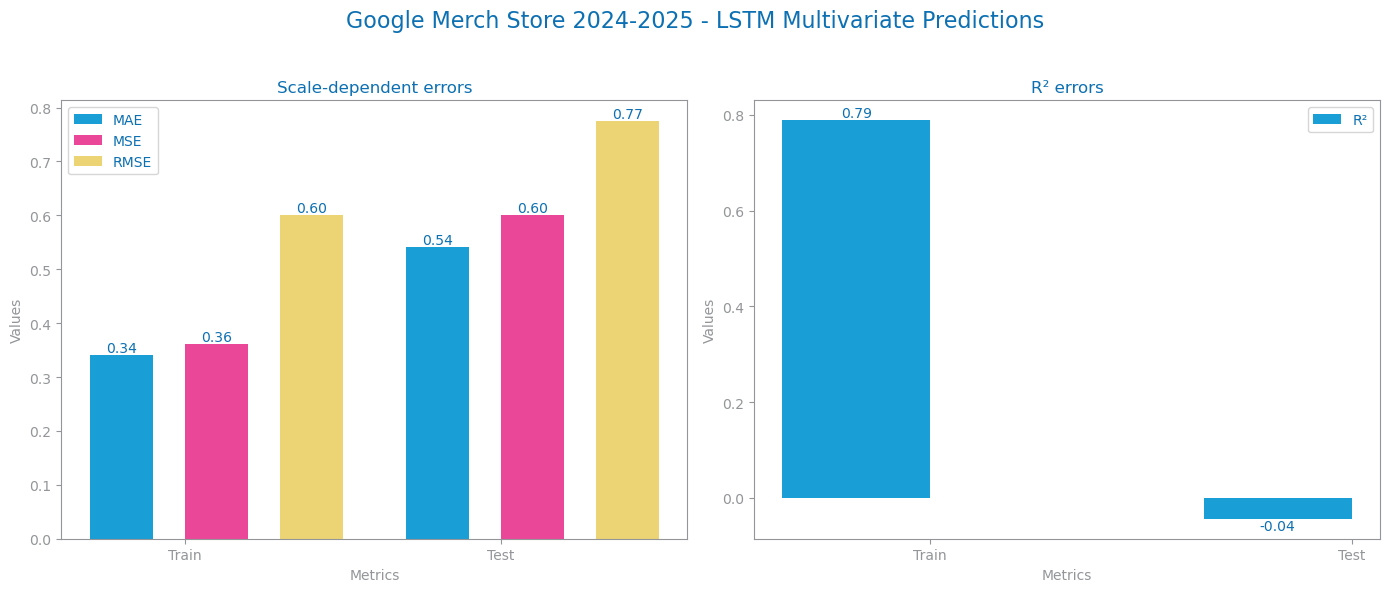

<Figure size 640x480 with 0 Axes>

In [109]:


# Predict the training and testing data
prd_trn = Series(model.predict(trnX_lstm).flatten(), index=train.index[seq_length:])
prd_tst = Series(model.predict(tstX_lstm).flatten(), index=test.index[seq_length:])

# Plot the forecasting evaluation
plot_single_model_evaluation(trnY[seq_length:], tstY[seq_length:], prd_trn, prd_tst, title=f"{file_tag} - LSTM Multivariate Predictions")
savefig(f"images/{file_tag}_LSTM_multivariate_predictions.png")

## Plot lstm tensorflow model multivariate

<Axes: xlabel='Date', ylabel='Sessions'>

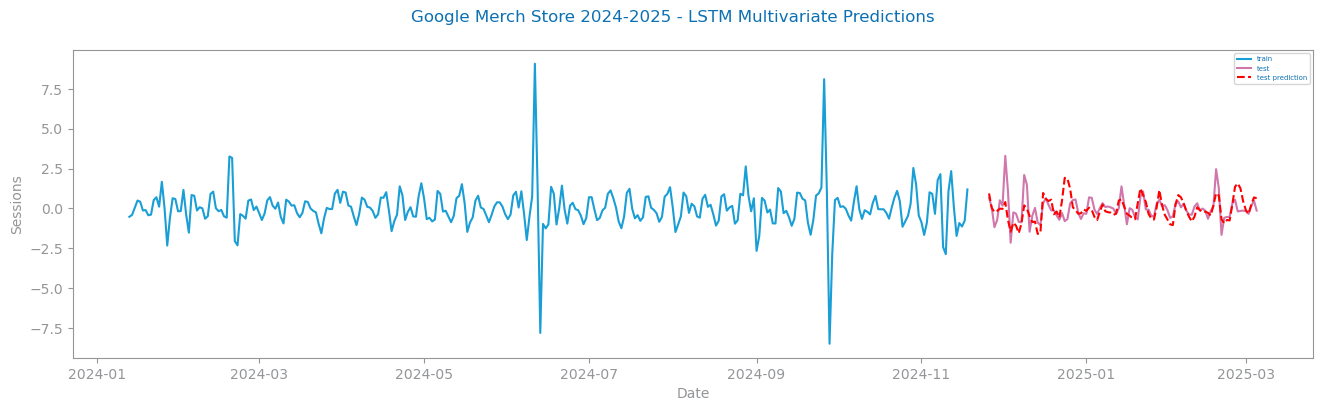

In [110]:
plot_forecasting_series(
    trnY[seq_length:], 
    tstY[seq_length:],
    prd_tst,
    title=f"{file_tag} - LSTM Multivariate Predictions",
    xlabel='Date',
    ylabel=target,
)

# LSTM Tensorflow Univariate

# Tensorflow Univariate Data Prep

In [111]:
# Prepare the training and testing data using the time index as the feature
trnX = arange(len(train)).reshape(-1, 1)
trnY = train[target].to_numpy()
tstX = arange(len(train), len(train+test)).reshape(-1, 1)
tstY = test[target].to_numpy()

# Convert the data to a format suitable for LSTM
def create_lstm_dataset(dataX, dataY, seq_length=1):
    X, y = [], []
    for i in range(len(dataX) - seq_length):
        X.append(dataX[i:(i + seq_length)])
        y.append(dataY[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7  # Example sequence length
trnX_lstm, trnY_lstm = create_lstm_dataset(trnX, trnY, seq_length)
tstX_lstm, tstY_lstm = create_lstm_dataset(tstX, tstY, seq_length)

print(f"Training data shape: {trnX_lstm.shape}, {trnY_lstm.shape}")
print(f"Testing data shape: {tstX_lstm.shape}, {tstY_lstm.shape}")

Training data shape: (311, 7, 1), (311,)
Testing data shape: (100, 7, 1), (100,)


## Tensorflow LSTM Univariate Model Creation

In [112]:
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model architecture

# Regularization: L2 regularization is added to the LSTM and Dense layers.
# Dropout Rate: The dropout rate is increased to 0.3.
# Learning Rate: The learning rate of the Adam optimizer is set to 0.001.
# Early Stopping: Early stopping is used to prevent overfitting.
# Learning Rate Scheduler: A learning rate scheduler is used to reduce the learning rate when the validation loss plateaus.


# model definition
model = tf.keras.models.Sequential()

# First LSTM layer
model.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(trnX_lstm.shape[1], trnX_lstm.shape[2]), kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Second LSTM layer
model.add(tf.keras.layers.LSTM(64, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.summary()


# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mean_squared_error']
              )

# Train the model
history = model.fit(trnX_lstm, trnY_lstm, epochs=20, batch_size=16, validation_data=(tstX_lstm, tstY_lstm), verbose=1)

# Evaluate the model
loss = model.evaluate(tstX_lstm, tstY_lstm, verbose=0)
print(f'Test Loss: {loss}')

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 7, 64)             16896     
                                                                 
 lstm_35 (LSTM)              (None, 64)                33024     
                                                                 
 dense_34 (Dense)            (None, 128)               8320      
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 58,369
Trainable params: 58,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
20/20 [==============================]

## LSTM Tensorflow Univariate Predictions

4/4 [==============================] - 0s 4ms/step


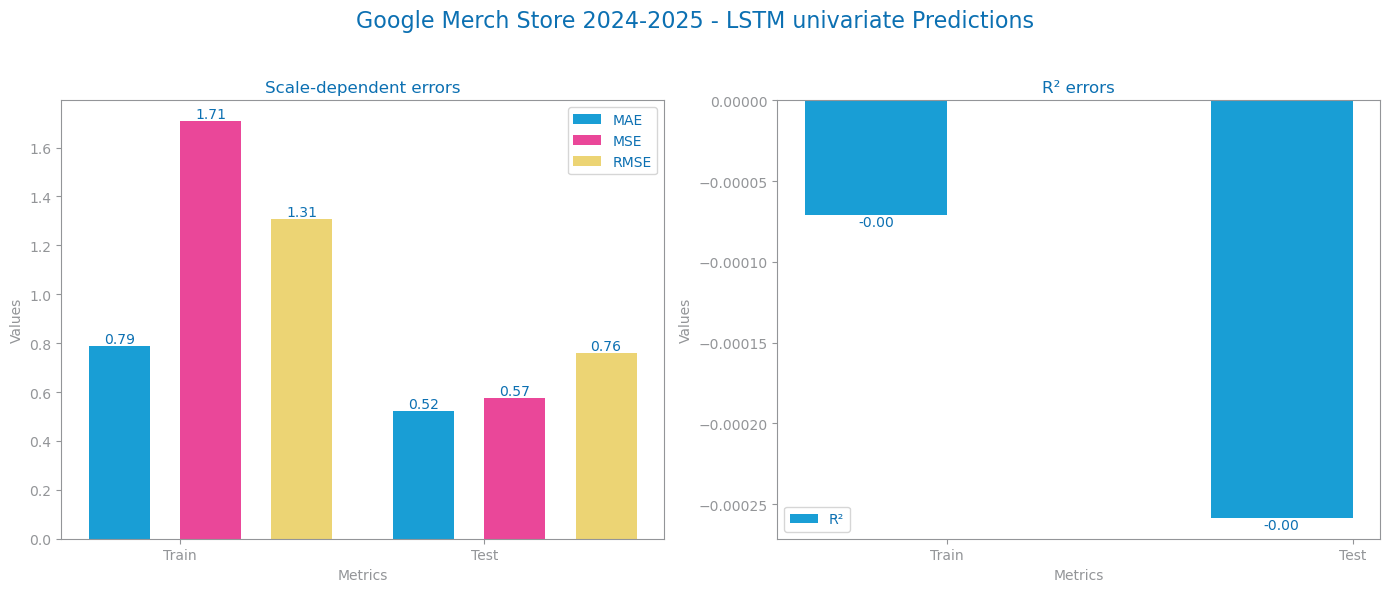

<Figure size 640x480 with 0 Axes>

In [113]:

# Predict the training and testing data
prd_trn = Series(model.predict(trnX_lstm).flatten(), index=train.index[seq_length:])
prd_tst = Series(model.predict(tstX_lstm).flatten(), index=test.index[seq_length:])

# Plot the forecasting evaluation
plot_single_model_evaluation(trnY[seq_length:], tstY[seq_length:], prd_trn, prd_tst, title=f"{file_tag} - LSTM univariate Predictions")
savefig(f"images/{file_tag}_LSTM_univariate_predictions.png")

## LSTM Tensorflow Univariate Plots

<Axes: xlabel='Date', ylabel='Sessions'>

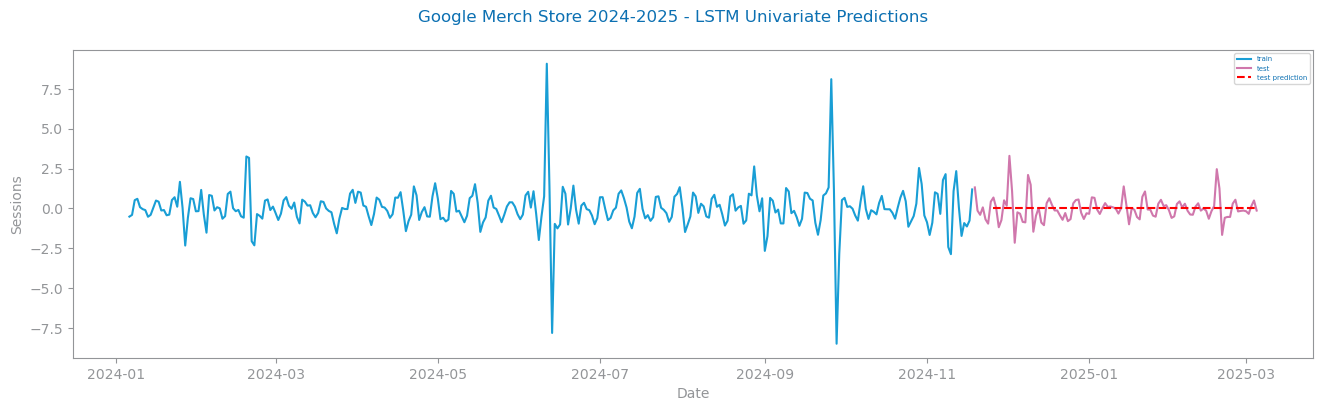

In [114]:
plot_forecasting_series(
    train[target],
    test[target],
    prd_tst,
    title=f"{file_tag} - LSTM Univariate Predictions",
    xlabel='Date',
    ylabel=target,
)